<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B43_E22CSEU1276_AbhayRaj/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from PIL import Image

In [40]:
img = cv2.imread('bg.bmp')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [41]:
jpeg_quality = 50
cv2.imwrite('compressed.jpeg', img, [cv2.IMWRITE_JPEG_QUALITY, jpeg_quality])

True

In [42]:
png_compression = 9
cv2.imwrite('compressed.png', img, [cv2.IMWRITE_PNG_COMPRESSION, png_compression])


True

In [38]:
import os


Original Image Size: 3198.88 KB
JPEG Compressed Image Size: 139.99 KB
PNG Compressed Image Size: 1977.07 KB


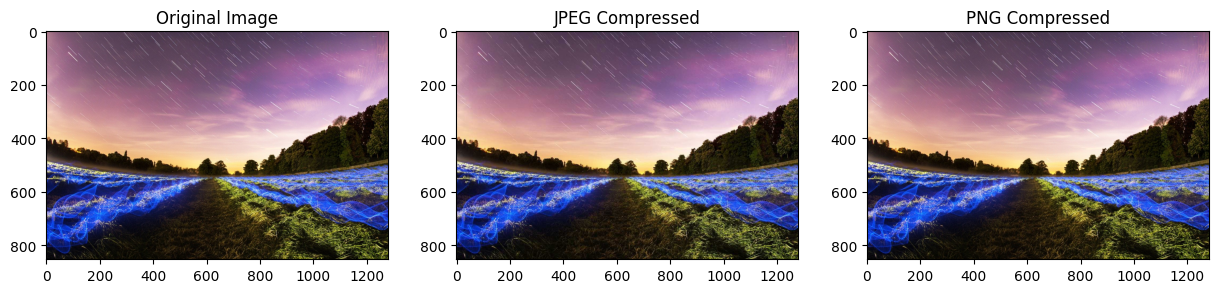

In [45]:

original_size = os.path.getsize("bg.bmp")
jpeg_size = os.path.getsize("compressed.jpeg")
png_size = os.path.getsize("compressed.png")

print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"JPEG Compressed Image Size: {jpeg_size / 1024:.2f} KB")
print(f"PNG Compressed Image Size: {png_size / 1024:.2f} KB")
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[1].imshow(plt.imread('compressed.jpeg'))
axes[1].set_title('JPEG Compressed')
axes[2].imshow(plt.imread('compressed.png'))
axes[2].set_title('PNG Compressed')

plt.show()

In [68]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [69]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu',kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9810 - loss: 0.0647 - val_accuracy: 0.9827 - val_loss: 0.0597
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9885 - loss: 0.0376 - val_accuracy: 0.9825 - val_loss: 0.0601
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9904 - loss: 0.0319 - val_accuracy: 0.9856 - val_loss: 0.0499
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 82ms/step - accuracy: 0.9945 - loss: 0.0195 - val_accuracy: 0.9844 - val_loss: 0.0555
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.9956 - loss: 0.0142 - val_accuracy: 0.9846 - val_loss: 0.0557
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9858 - val_loss: 0.0536
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9984 - loss: 0.0068 - val_accuracy: 0.9855 - val_loss: 0.0563
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9989 - loss: 0.0050 - 

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
model.fit(x_train, y_train, epochs=50,batch_size=64, validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9001 - loss: 0.5943 - val_accuracy: 0.9525 - val_loss: 0.4433
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9166 - loss: 0.5490 - val_accuracy: 0.9587 - val_loss: 0.4133
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.9233 - loss: 0.5173 - val_accuracy: 0.9626 - val_loss: 0.3885
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9269 - loss: 0.5007 - val_accuracy: 0.9581 - val_loss: 0.3892
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9341 - loss: 0.4725 - val_accuracy: 0.9647 - val_loss: 0.3586
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9355 - loss: 0.4557 - val_accuracy: 0.9658 - val_loss: 0.3553
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9376 - loss: 0.4451 - val_accuracy: 0.9654 - val_loss: 0.3475
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9388 - loss: 0.4386 - 

In [73]:
preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



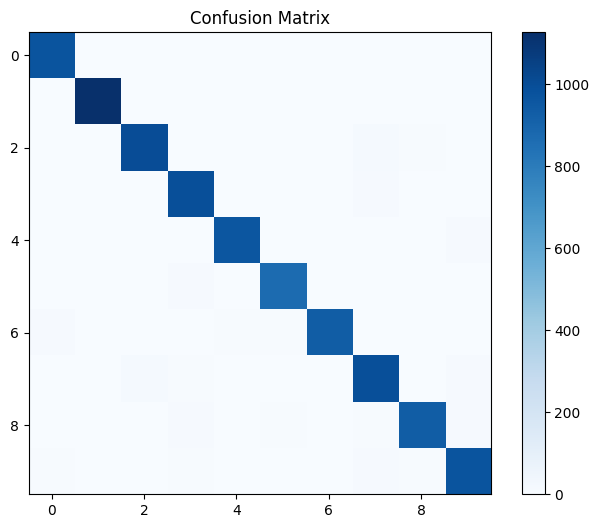

In [74]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

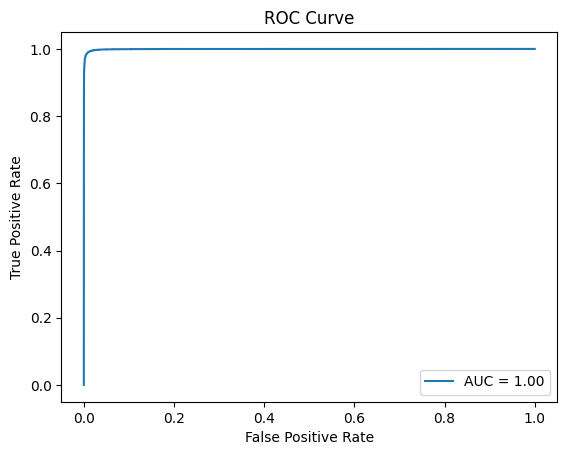

In [75]:
fpr, tpr, _ = roc_curve(y_test.ravel(), preds.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [58]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [59]:
model_cifar = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cifar.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.3600 - loss: 1.7823 - val_accuracy: 0.5285 - val_loss: 1.3490
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 107ms/step - accuracy: 0.5500 - loss: 1.2801 - val_accuracy: 0.5398 - val_loss: 1.3136
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.5949 - loss: 1.1661 - val_accuracy: 0.5807 - val_loss: 1.1909
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.6277 - loss: 1.0707 - val_accuracy: 0.6060 - val_loss: 1.1321
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.6481 - loss: 1.0196 - val_accuracy: 0.6049 - val_loss: 1.1364
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.6666 - loss: 0.9542 - val_accuracy: 0.5970 - val_loss: 1.1487
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.6895 - loss: 0.9070 - val_accuracy: 0.6276 - val_loss: 1.0770
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.6987 - loss: 0.873

In [61]:
preds_cifar = model_cifar.predict(x_test)
y_pred_cifar = np.argmax(preds_cifar, axis=1)
y_true_cifar = np.argmax(y_test, axis=1)
print(classification_report(y_true_cifar, y_pred_cifar))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1000
           1       0.75      0.74      0.75      1000
           2       0.51      0.42      0.46      1000
           3       0.46      0.40      0.43      1000
           4       0.53      0.61      0.56      1000
           5       0.48      0.56      0.52      1000
           6       0.68      0.70      0.69      1000
           7       0.67      0.68      0.67      1000
           8       0.75      0.70      0.72      1000
           9       0.68      0.72      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



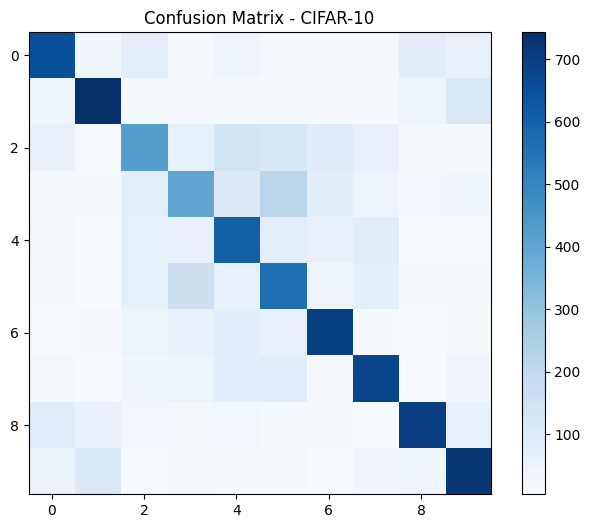

In [62]:
cm_cifar = confusion_matrix(y_true_cifar, y_pred_cifar)
plt.figure(figsize=(8, 6))
plt.imshow(cm_cifar, cmap='Blues')
plt.title('Confusion Matrix - CIFAR-10')
plt.colorbar()
plt.show()

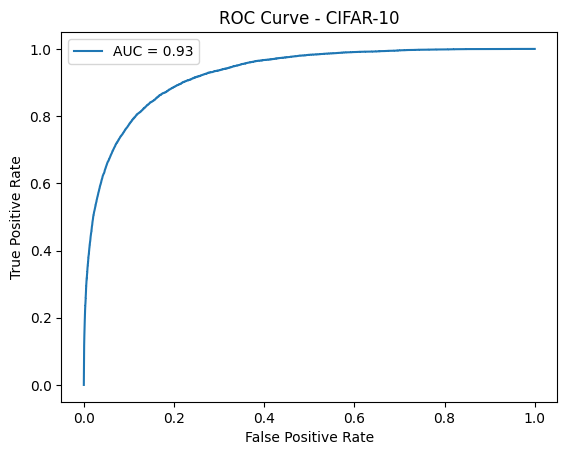

In [63]:
fpr_cifar, tpr_cifar, _ = roc_curve(y_test.ravel(), preds_cifar.ravel())
roc_auc_cifar = auc(fpr_cifar, tpr_cifar)
plt.plot(fpr_cifar, tpr_cifar, label=f'AUC = {roc_auc_cifar:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CIFAR-10')
plt.legend()
plt.show()